In [15]:
import pandas as pd
import numpy as np

# Load the ratings data
file_path = '/content/ratings.csv'
ratings_data = pd.read_csv(file_path)

# Select 4 unique user IDs and 6 unique movie IDs
selected_users = ratings_data['userId'].unique()[:4]
selected_movies = ratings_data['movieId'].unique()[:6]

# Filter the dataset for the selected users and movies
filtered_data = ratings_data[(ratings_data['userId'].isin(selected_users)) &
                             (ratings_data['movieId'].isin(selected_movies))]

# Create a pivot table with userId as rows, movieId as columns, and ratings as values
user_item_matrix = filtered_data.pivot(index='userId', columns='movieId', values='rating')

# Reindex to ensure all selected users and movies are represented and fill missing ratings initially
user_item_matrix = user_item_matrix.reindex(index=selected_users, columns=selected_movies).fillna(method='ffill')

# Set exactly 4 values to NaN based on previously confirmed positions
user_item_matrix.iloc[0, 3] = np.nan
user_item_matrix.iloc[1, 2] = np.nan
user_item_matrix.iloc[3, 0] = np.nan
user_item_matrix.iloc[3, 4] = np.nan

# Display the final matrix
user_item_matrix


<ipython-input-15-9da71358dfca>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_item_matrix = user_item_matrix.reindex(index=selected_users, columns=selected_movies).fillna(method='ffill')


movieId,1,3,6,47,50,70
userId,,,,,,
1,4.0,4.0,4.0,NaN,5.0,3.0
2,4.0,4.0,NaN,5.0,5.0,3.0
3,4.0,4.0,4.0,5.0,5.0,3.0
4,NaN,4.0,4.0,2.0,NaN,3.0


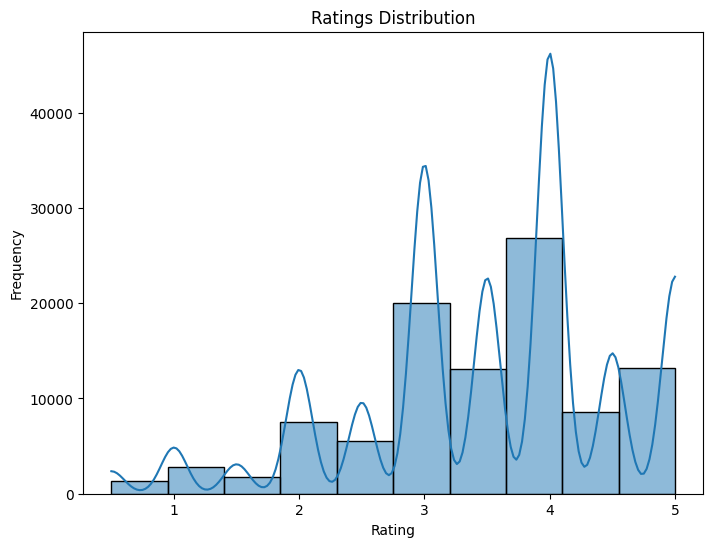

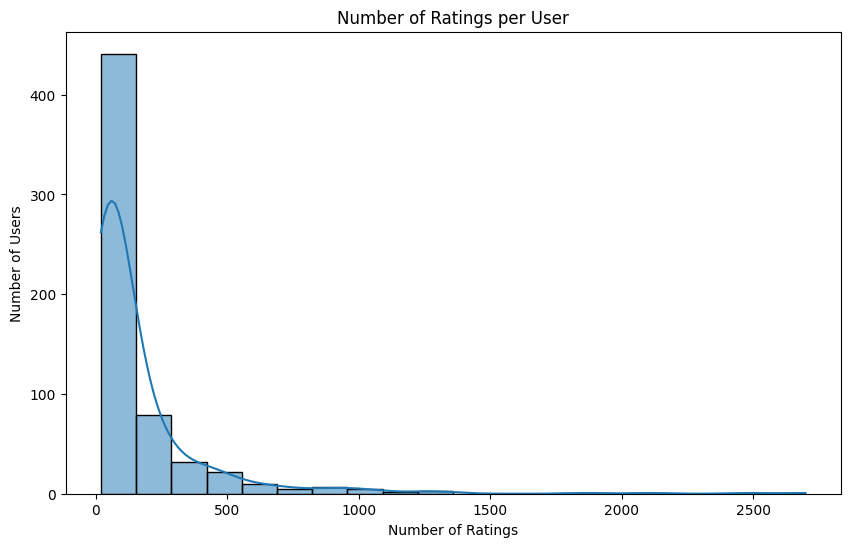

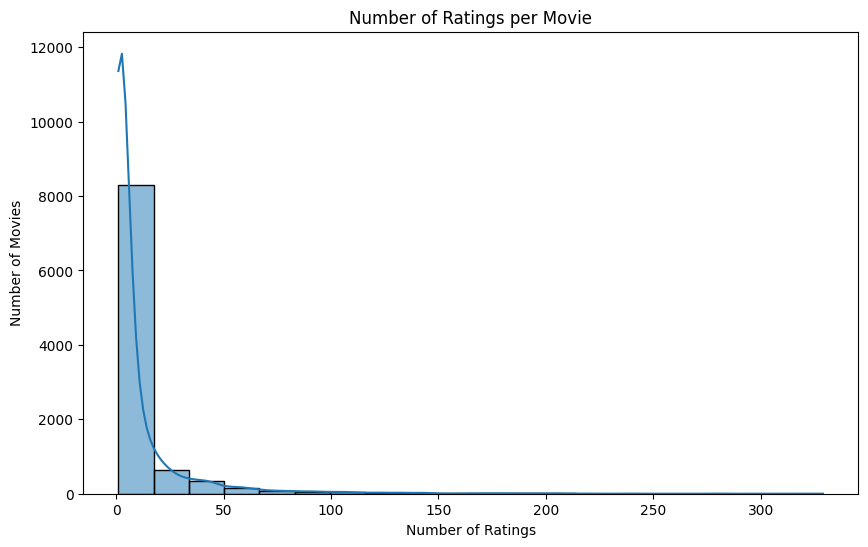

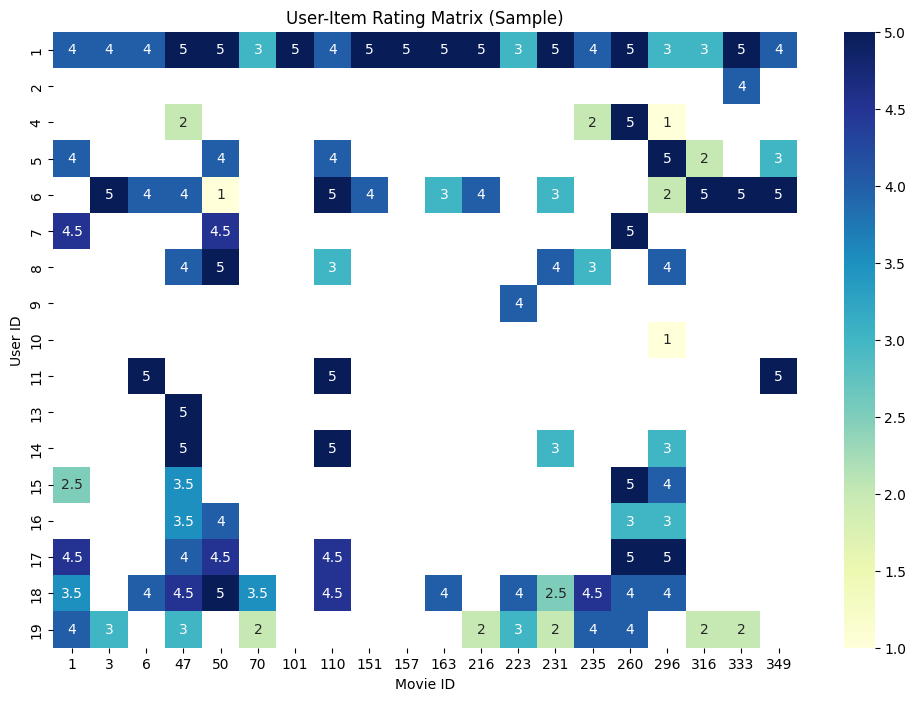

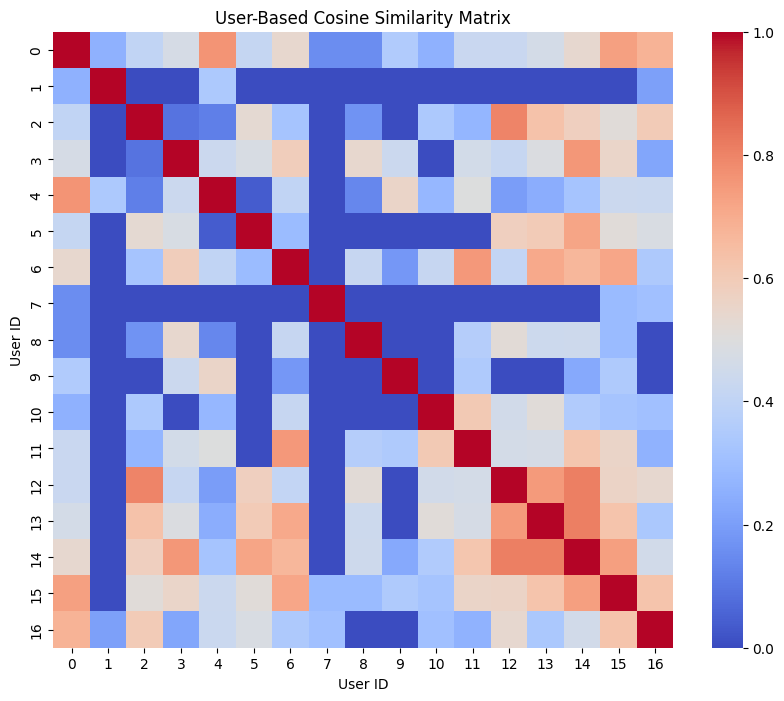

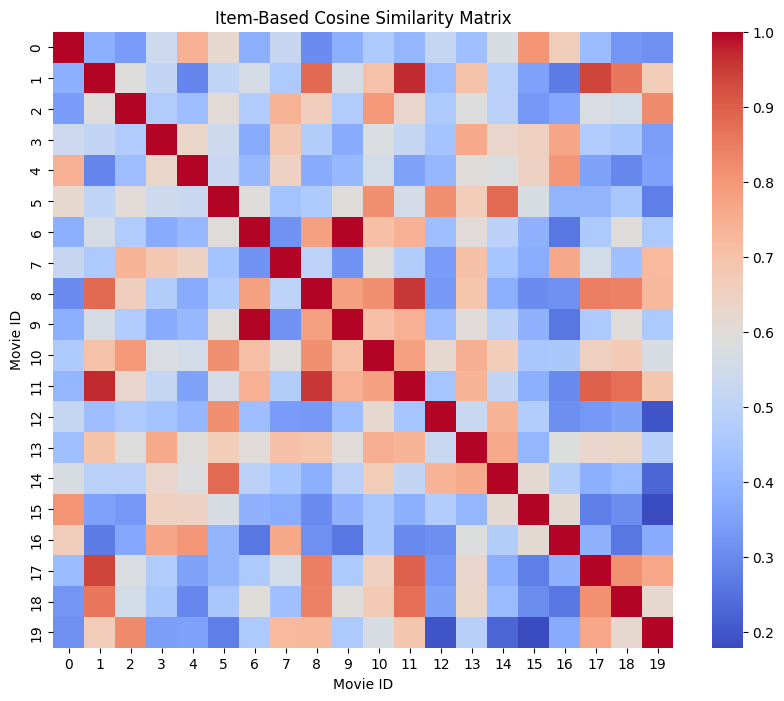

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



# Basic visualization of rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(ratings_data['rating'], bins=10, kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Count of ratings per user
plt.figure(figsize=(10, 6))
ratings_per_user = ratings_data.groupby('userId').size()
sns.histplot(ratings_per_user, bins=20, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# Count of ratings per movie
plt.figure(figsize=(10, 6))
ratings_per_movie = ratings_data.groupby('movieId').size()
sns.histplot(ratings_per_movie, bins=20, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

# Visualize a sample of the user-item matrix
sample_users = ratings_data['userId'].unique()[:20]
sample_movies = ratings_data['movieId'].unique()[:20]
sample_data = ratings_data[(ratings_data['userId'].isin(sample_users)) &
                           (ratings_data['movieId'].isin(sample_movies))]

user_item_matrix = sample_data.pivot(index='userId', columns='movieId', values='rating')

plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title("User-Item Rating Matrix (Sample)")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.show()

# Visualize user-based similarity (Cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(user_item_matrix.fillna(0))
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, cmap="coolwarm", annot=False)
plt.title("User-Based Cosine Similarity Matrix")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

# Visualize item-based similarity (Cosine similarity)
item_cosine_sim_matrix = cosine_similarity(user_item_matrix.fillna(0).T)
plt.figure(figsize=(10, 8))
sns.heatmap(item_cosine_sim_matrix, cmap="coolwarm", annot=False)
plt.title("Item-Based Cosine Similarity Matrix")
plt.xlabel("Movie ID")
plt.ylabel("Movie ID")
plt.show()

In [8]:

# Calculate the average rating for each user
user_item_matrix['mean rating'] = user_item_matrix.iloc[:, 1:].mean(axis=1) # Calculate the mean across columns starting from the 2nd column (ratings)

# Display the updated dataframe
user_item_matrix

movieId,1,3,6,47,50,70,mean rating
userId,,,,,,,
1,4.0,4.0,4.0,NaN,5.0,3.0,4.00
2,4.0,4.0,NaN,5.0,5.0,3.0,4.25
3,4.0,4.0,4.0,5.0,5.0,3.0,4.20
4,NaN,4.0,4.0,2.0,NaN,3.0,3.25


In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample user-item rating matrix for demonstration (replace this with actual data)
data = {
    '1': [4.0, 4.0, 4.0, np.nan],
    '3': [4.0, 4.0, np.nan, 4.0],
    '6': [4.0, np.nan, 4.0, 4.0],
    '47': [np.nan, 5.0, 5.0, 2.0],
    '50': [5.0, 5.0, 5.0, np.nan],
    '70': [3.0, 3.0, 3.0, 3.0]
}
user_item_matrix = pd.DataFrame(data, index=['1', '2', '3', '4'])

# Fill NaN values with the mean rating of each user to handle missing data
user_item_matrix = user_item_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# User-Based CF: Compute cosine similarity between users
cosine_similarity_users = cosine_similarity(user_item_matrix)
cosine_similarity_users_df = pd.DataFrame(cosine_similarity_users, index=user_item_matrix.index, columns=user_item_matrix.index)

# Item-Based CF: Compute cosine similarity between items
cosine_similarity_items = cosine_similarity(user_item_matrix.T)
cosine_similarity_items_df = pd.DataFrame(cosine_similarity_items, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Compute Pearson correlation for user-based similarity
pearson_similarity_users = user_item_matrix.T.corr(method='pearson')
pearson_similarity_users_df = pd.DataFrame(pearson_similarity_users, index=user_item_matrix.index, columns=user_item_matrix.index)

# Compute Pearson correlation for item-based similarity
pearson_similarity_items = user_item_matrix.corr(method='pearson')
pearson_similarity_items_df = pd.DataFrame(pearson_similarity_items, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Display the results
print("User-Based Cosine Similarity:\n", cosine_similarity_users_df)
print("\nItem-Based Cosine Similarity:\n", cosine_similarity_items_df)
print("\nUser-Based Pearson Similarity:\n", pearson_similarity_users_df)
print("\nItem-Based Pearson Similarity:\n", pearson_similarity_items_df)


User-Based Cosine Similarity:
           1         2         3         4
1  1.000000  0.996289  0.996289  0.972050
2  0.996289  1.000000  0.999632  0.956258
3  0.996289  0.999632  1.000000  0.956258
4  0.972050  0.956258  0.956258  1.000000

Item-Based Cosine Similarity:
            1         3         6        47        50        70
1   1.000000  0.996769  0.996769  0.976160  0.996833  0.996392
3   0.996769  1.000000  0.999391  0.958915  0.987429  0.999771
6   0.996769  0.999391  1.000000  0.958915  0.987429  0.999771
47  0.976160  0.958915  0.958915  1.000000  0.988486  0.956183
50  0.996833  0.987429  0.987429  0.988486  1.000000  0.986486
70  0.996392  0.999771  0.999771  0.956183  0.986486  1.000000

User-Based Pearson Similarity:
           1         2         3         4
1  1.000000  0.845154  0.845154  0.106600
2  0.845154  1.000000  0.985714 -0.306319
3  0.845154  0.985714  1.000000 -0.306319
4  0.106600 -0.306319 -0.306319  1.000000

Item-Based Pearson Similarity:
           

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample user-item rating matrix (replace this with your actual user-item matrix)
data = {
    '1': [4.0, 4.0, 4.0, np.nan],
    '3': [4.0, 4.0, np.nan, 4.0],
    '6': [4.0, np.nan, 4.0, 4.0],
    '47': [np.nan, 5.0, 5.0, 2.0],
    '50': [5.0, 5.0, 5.0, np.nan],
    '70': [3.0, 3.0, 3.0, 3.0]
}
user_item_matrix = pd.DataFrame(data, index=['1', '2', '3', '4'])

# Fill NaN values with the mean rating of each user
user_item_matrix = user_item_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# User-based cosine similarity matrix
cosine_similarity_users = cosine_similarity(user_item_matrix)
cosine_similarity_users_df = pd.DataFrame(cosine_similarity_users, index=user_item_matrix.index, columns=user_item_matrix.index)

# Item-based cosine similarity matrix
cosine_similarity_items = cosine_similarity(user_item_matrix.T)
cosine_similarity_items_df = pd.DataFrame(cosine_similarity_items, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# User-based Pearson similarity matrix
pearson_similarity_users_df = user_item_matrix.T.corr(method='pearson')

# Item-based Pearson similarity matrix
pearson_similarity_items_df = user_item_matrix.corr(method='pearson')

# Function to predict ratings based on similarity matrix
def predict_ratings(matrix, similarity_matrix, user_based=True):
    predictions = pd.DataFrame(np.dot(similarity_matrix, matrix) / np.abs(similarity_matrix).sum(axis=1)[:, None],
                               index=matrix.index, columns=matrix.columns)
    return predictions

# Rating prediction using cosine similarity
user_cosine_predictions = predict_ratings(user_item_matrix, cosine_similarity_users)
item_cosine_predictions = predict_ratings(user_item_matrix.T, cosine_similarity_items).T

# Rating prediction using Pearson similarity
user_pearson_predictions = predict_ratings(user_item_matrix, pearson_similarity_users_df.to_numpy())
item_pearson_predictions = predict_ratings(user_item_matrix.T, pearson_similarity_items_df.to_numpy()).T

# Function to get top-N recommendations
def top_n_recommendations(predictions, n=3):
    recommendations = predictions.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
    return recommendations

# Top-N recommendations
top_n_cosine_user_based = top_n_recommendations(user_cosine_predictions)
top_n_cosine_item_based = top_n_recommendations(item_cosine_predictions)

top_n_pearson_user_based = top_n_recommendations(user_pearson_predictions)
top_n_pearson_item_based = top_n_recommendations(item_pearson_predictions)

# Display the results
print("User-Based CF Predictions using Cosine Similarity:\n", user_cosine_predictions)
print("\nItem-Based CF Predictions using Cosine Similarity:\n", item_cosine_predictions)
print("\nUser-Based CF Predictions using Pearson Similarity:\n", user_pearson_predictions)
print("\nItem-Based CF Predictions using Pearson Similarity:\n", item_pearson_predictions)

print("\nTop-N Recommendations (User-Based CF, Cosine Similarity):\n", top_n_cosine_user_based)
print("\nTop-N Recommendations (Item-Based CF, Cosine Similarity):\n", top_n_cosine_item_based)
print("\nTop-N Recommendations (User-Based CF, Pearson Similarity):\n", top_n_pearson_user_based)
print("\nTop-N Recommendations (Item-Based CF, Pearson Similarity):\n", top_n_pearson_item_based)


User-Based CF Predictions using Cosine Similarity:
           1         3         6        47        50   70
1  3.816115  4.050259  4.050259  4.012228  4.570934  3.0
2  3.818532  4.050586  4.050605  4.022042  4.576575  3.0
3  3.818532  4.050605  4.050586  4.022042  4.576575  3.0
4  3.806928  4.049234  4.049234  3.977479  4.549499  3.0

Item-Based CF Predictions using Cosine Similarity:
           1         3         6        47        50        70
1  4.000074  3.997923  3.997923  4.005533  4.002272  3.997724
2  4.197211  4.192931  4.192952  4.209652  4.201707  4.192406
3  4.197211  4.192952  4.192931  4.209652  4.201707  4.192406
4  3.254336  3.258575  3.258575  3.241321  3.249817  3.259165

User-Based CF Predictions using Pearson Similarity:
           1         3         6        47        50        70
1  3.971415  4.060435  4.060435  4.528122  4.933301  3.000000
2  3.292101  3.281711  3.282622  4.047113  4.194460  2.414153
3  3.292101  3.282622  3.281711  4.047113  4.194460  2.41415